In [1]:
import matplotlib.pyplot as plt

import numpy as np
import os
from ctd.comparison.analysis.tt.tt import Analysis_TT 
from ctd.comparison.analysis.dt.dt import Analysis_DT
# Import pca
import dotenv
from ctd.comparison.comparison import Comparison
import torch
from sklearn.decomposition import PCA

dotenv.load_dotenv(dotenv.find_dotenv())

True

In [2]:

HOME_DIR = os.environ['HOME_DIR']
print(HOME_DIR)

pathTT = HOME_DIR + 'content/trained_models/task-trained/20240418_NBFF_NoisyGRU_Final4/max_epochs=500 latent_size=64 seed=0/'
an_TT = Analysis_TT(run_name = "TT", filepath = pathTT)

path_NODE =pathTT + "20240430_Fig1_NBFF_NODE/gen_model=NoisyGRU_RNN prefix=20240418_NBFF_NoisyGRU_Final4 seed=0 max_epochs=1000 latent_size=3/"
path_LDS = pathTT + "20240430_Fig1_NBFF_LDS/gen_model=NoisyGRU_RNN prefix=20240418_NBFF_NoisyGRU_Final4 seed=0 max_epochs=1000/"
path_GRU = pathTT + "20240419_Fig1_NBFF_GRU_Sweep/gen_model=NoisyGRU_RNN prefix=20240418_NBFF_NoisyGRU_Final4 seed=0 max_epochs=500/"

/home/csverst/Github/CtDBenchmark/


In [3]:
comparison = Comparison(comparison_tag="Figure1NBFF_LDS")
comparison.load_analysis(an_TT, reference_analysis=True, group = "TT")

analysis_LDS = Analysis_DT(run_name = "LDS", filepath = path_LDS, model_type = "SAE")
comparison.load_analysis(analysis_LDS, group = "LDS")

analysis_NODE = Analysis_DT(run_name = "NODE", filepath = path_NODE, model_type = "SAE")
comparison.load_analysis(analysis_NODE, group = "NODE")

analysis_GRU = Analysis_DT(run_name = "GRU", filepath = path_GRU, model_type = "SAE")
comparison.load_analysis(analysis_GRU, group = "GRU")

comparison.regroup()

Working on 1 of 4: GRU
Group: GRU
Rate R2: 0.9251096779421366
State R2: 0.9747599452496538
Working on 2 of 4: LDS
Group: LDS
Rate R2: 0.34300264473362824
State R2: 0.33108505182292486
Working on 3 of 4: NODE
Group: NODE
Rate R2: 0.7644362992081531
State R2: 0.8454268038552336
Working on 4 of 4: TT
Group: TT


array([[0.92510968, 0.97475995],
       [0.34300264, 0.33108505],
       [0.7644363 , 0.8454268 ],
       [0.        , 0.        ]])

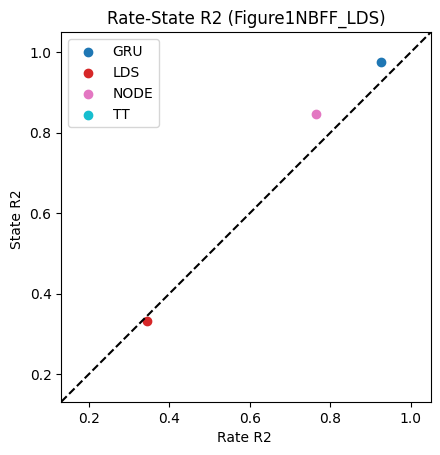

In [4]:
comparison.compare_rate_state_r2(save_pdf=True)

In [5]:
#comparison.plot_trials_3d_reference(num_trials =3)

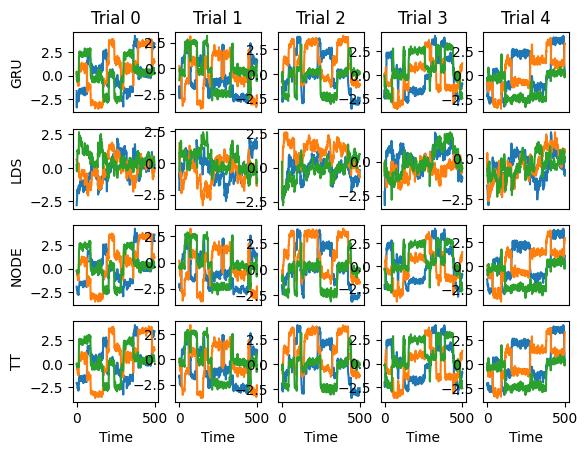

In [6]:
comparison.plot_trials_reference(num_trials =5)

In [7]:
def plot_model_fps(fps, latents = None, q_thresh = 1e-5):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    x_star = fps.xstar
    q_star = fps.qstar
    q_flag = q_star < q_thresh
    stability= fps.is_stable
    x_star = x_star[q_flag]
    q_star = q_star[q_flag]
    pca = PCA(n_components=3)
    x_star = pca.fit_transform(x_star)
    stability = stability[q_flag]
    stable_X = x_star[stability]
    unstable_X = x_star[~stability]
    ax.scatter(stable_X[:,0], stable_X[:,1], stable_X[:,2], c='g', marker='o', label = "Stable")
    ax.scatter(unstable_X[:,0], unstable_X[:,1], unstable_X[:,2], c='r', marker='x', label = "Unstable")
    if latents is not None:
        latents = pca.transform(latents)
        for i in range(100):
            ax.plot(latents[:,0], latents[:,1], latents[:,2], 'k')
    ax.set_title('Model FPS')
    ax.legend()
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')



Iteration 500/50000
q = 3.33E-02 +/- 1.24E-01
dq = 1.23E-04 +/- 4.05E-04

Iteration 1000/50000
q = 7.79E-03 +/- 3.40E-02
dq = 1.83E-05 +/- 7.62E-05

Iteration 1500/50000
q = 2.85E-03 +/- 1.28E-02
dq = 4.92E-06 +/- 2.31E-05

Iteration 2000/50000
q = 1.36E-03 +/- 5.90E-03
dq = 1.73E-06 +/- 8.36E-06

Iteration 2500/50000
q = 7.83E-04 +/- 3.31E-03
dq = 7.46E-07 +/- 3.41E-06

Iteration 3000/50000
q = 5.10E-04 +/- 2.14E-03
dq = 3.98E-07 +/- 1.73E-06

Iteration 3500/50000
q = 3.54E-04 +/- 1.49E-03
dq = 2.44E-07 +/- 1.07E-06

Iteration 4000/50000
q = 2.54E-04 +/- 1.07E-03
dq = 1.63E-07 +/- 7.20E-07

Iteration 4500/50000
q = 1.86E-04 +/- 7.80E-04
dq = 1.13E-07 +/- 5.03E-07

Iteration 5000/50000
q = 1.38E-04 +/- 5.71E-04
dq = 8.12E-08 +/- 3.64E-07

Iteration 5500/50000
q = 1.03E-04 +/- 4.18E-04
dq = 5.94E-08 +/- 2.71E-07

Iteration 6000/50000
q = 7.77E-05 +/- 3.06E-04
dq = 4.31E-08 +/- 1.95E-07

Iteration 6500/50000
q = 5.92E-05 +/- 2.24E-04
dq = 3.15E-08 +/- 1.42E-07

Iteration 7000/50000
q = 

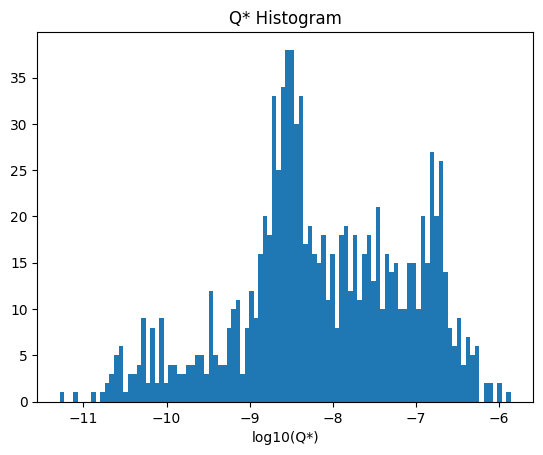

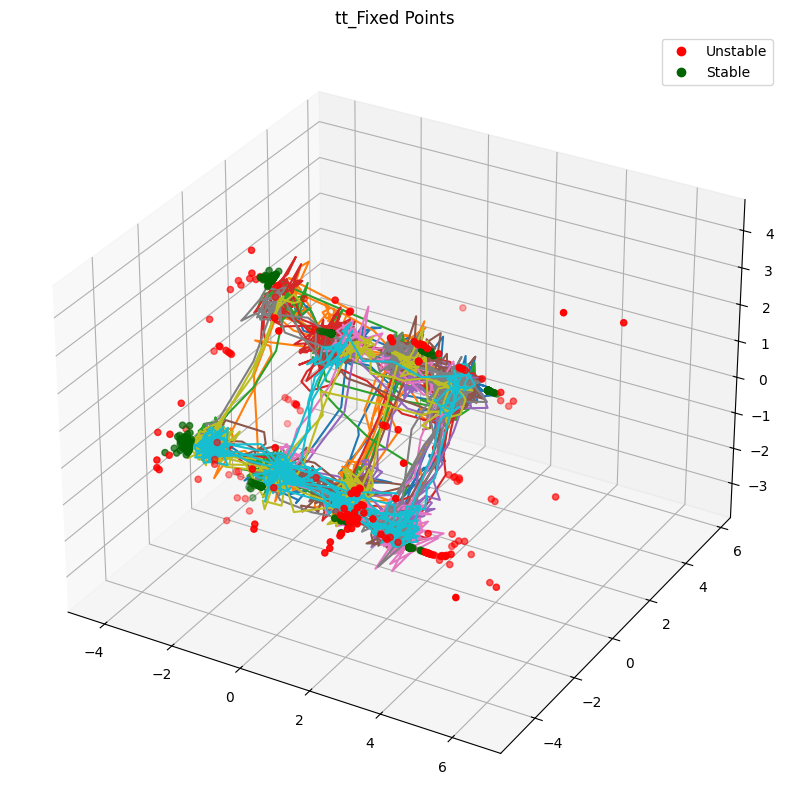

In [17]:
tt_fps = an_TT.plot_fps(
    inputs = torch.zeros(3),
    n_inits = 1024,
    learning_rate=6e-4,
    max_iters= 50000,
    
)

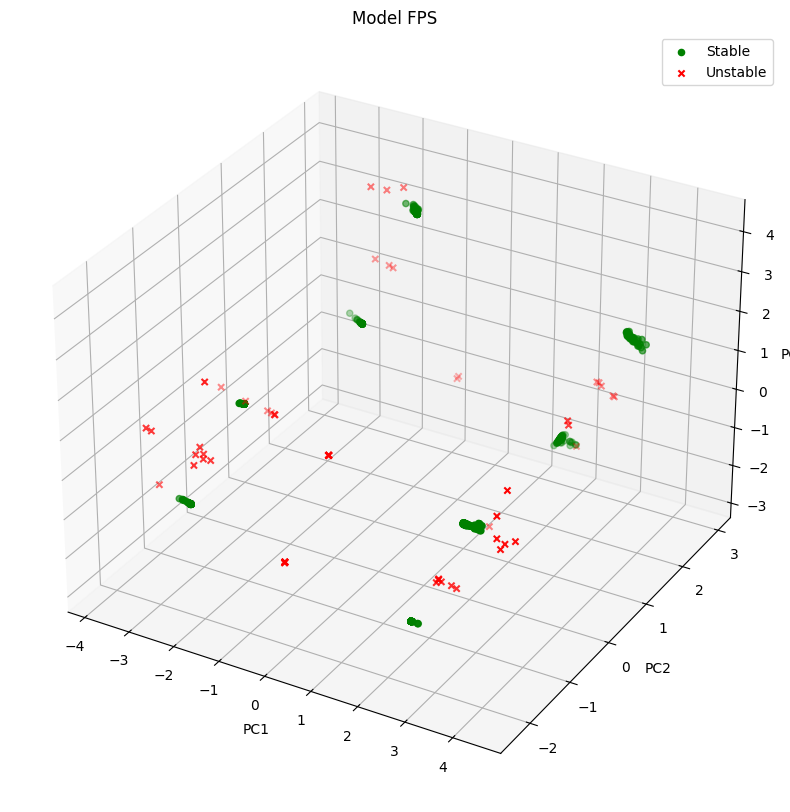

In [19]:
plot_model_fps(tt_fps, q_thresh = 1e-7)


Iteration 500/20000
q = 4.37E-02 +/- 2.24E-01
dq = 1.94E-04 +/- 7.39E-04

Iteration 1000/20000
q = 7.84E-03 +/- 7.48E-02
dq = 1.96E-05 +/- 1.37E-04

Iteration 1500/20000
q = 3.20E-03 +/- 3.22E-02
dq = 3.93E-06 +/- 5.48E-05

Iteration 2000/20000
q = 2.07E-03 +/- 1.34E-02
dq = 1.21E-06 +/- 2.49E-05

Iteration 2500/20000
q = 1.69E-03 +/- 5.15E-03
dq = 4.64E-07 +/- 1.05E-05

Iteration 3000/20000
q = 1.52E-03 +/- 2.24E-03
dq = 2.25E-07 +/- 3.68E-06

Iteration 3500/20000
q = 1.43E-03 +/- 1.64E-03
dq = 1.58E-07 +/- 9.93E-07

Iteration 4000/20000
q = 1.36E-03 +/- 1.51E-03
dq = 1.56E-07 +/- 2.59E-07

Iteration 4500/20000
q = 1.27E-03 +/- 1.43E-03
dq = 1.76E-07 +/- 2.18E-07

Iteration 5000/20000
q = 1.18E-03 +/- 1.35E-03
dq = 2.00E-07 +/- 2.40E-07

Iteration 5500/20000
q = 1.07E-03 +/- 1.26E-03
dq = 2.23E-07 +/- 2.60E-07

Iteration 6000/20000
q = 9.57E-04 +/- 1.17E-03
dq = 2.40E-07 +/- 2.75E-07

Iteration 6500/20000
q = 8.35E-04 +/- 1.06E-03
dq = 2.49E-07 +/- 2.81E-07

Iteration 7000/20000
q = 

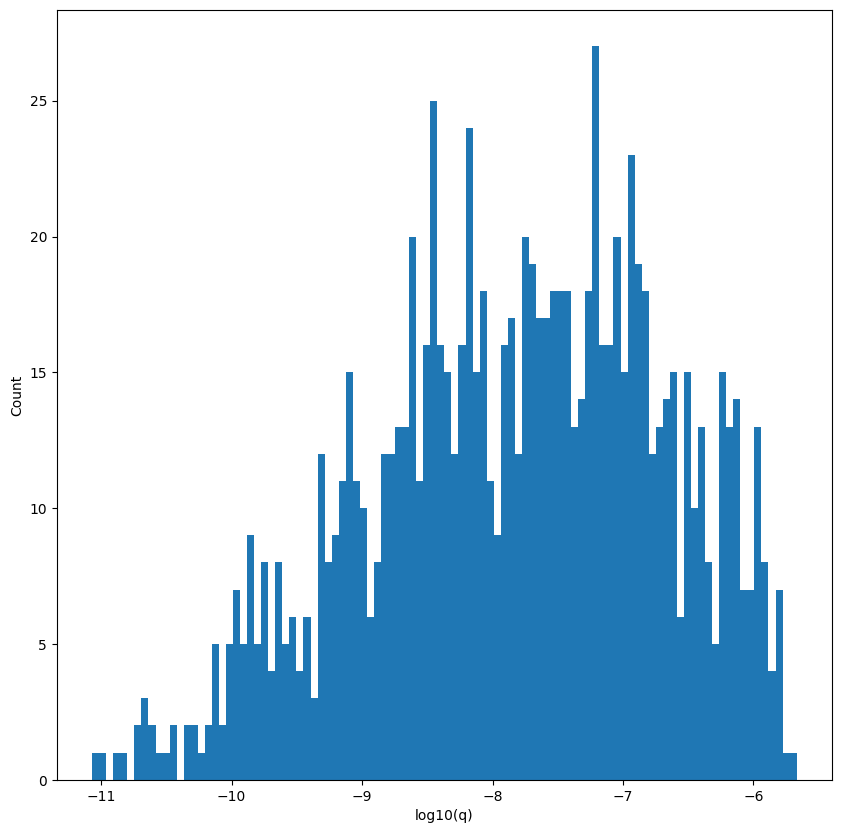

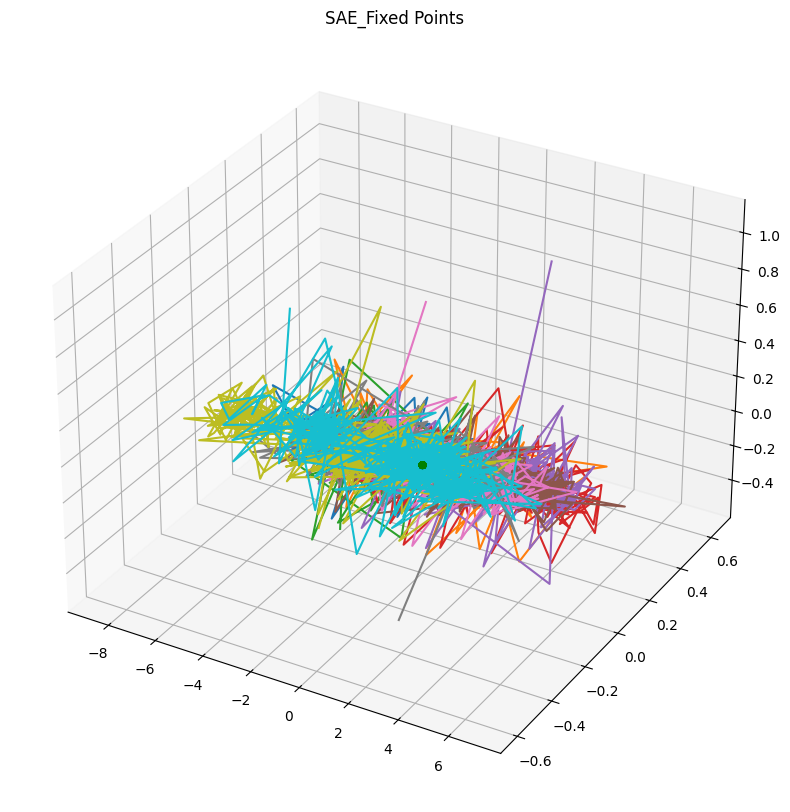

In [9]:
lds_fps = analysis_LDS.plot_fps(
    inputs = torch.zeros(3),
    learning_rate = 1e-3,
    n_inits=1024,
    max_iters = 20000,                      
)




Iteration 500/50000
q = 4.62E-04 +/- 1.48E-03
dq = 1.91E-06 +/- 6.31E-06

Iteration 1000/50000
q = 8.42E-05 +/- 4.45E-04
dq = 1.77E-07 +/- 7.23E-07

Iteration 1500/50000
q = 4.27E-05 +/- 4.04E-04
dq = 2.65E-08 +/- 1.25E-07

Iteration 2000/50000
q = 3.40E-05 +/- 3.99E-04
dq = 9.79E-09 +/- 9.35E-08

Iteration 2500/50000
q = 2.97E-05 +/- 3.97E-04
dq = 6.79E-09 +/- 6.80E-08

Iteration 3000/50000
q = 2.82E-05 +/- 3.96E-04
dq = 2.68E-09 +/- 2.97E-08

Iteration 3500/50000
q = 2.74E-05 +/- 3.96E-04
dq = 6.48E-10 +/- 7.32E-09

Iteration 4000/50000
q = 2.70E-05 +/- 3.96E-04
dq = 1.05E-09 +/- 1.54E-08

Iteration 4500/50000
q = 2.67E-05 +/- 3.96E-04
dq = 5.65E-10 +/- 6.50E-09

Iteration 5000/50000
q = 2.65E-05 +/- 3.96E-04
dq = 3.52E-10 +/- 6.26E-09

Iteration 5500/50000
q = 2.64E-05 +/- 3.96E-04
dq = 2.22E-09 +/- 6.37E-08

Iteration 6000/50000
q = 2.63E-05 +/- 3.96E-04
dq = 1.06E-10 +/- 1.78E-09

Iteration 6500/50000
q = 2.63E-05 +/- 3.96E-04
dq = 3.79E-10 +/- 6.61E-09

Iteration 7000/50000
q = 

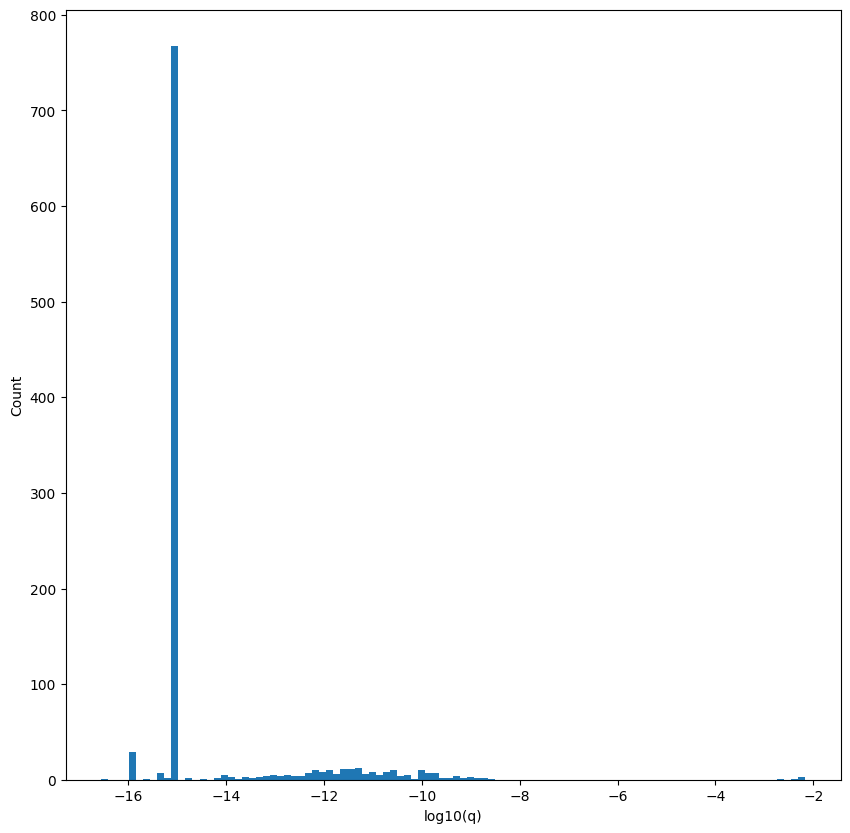

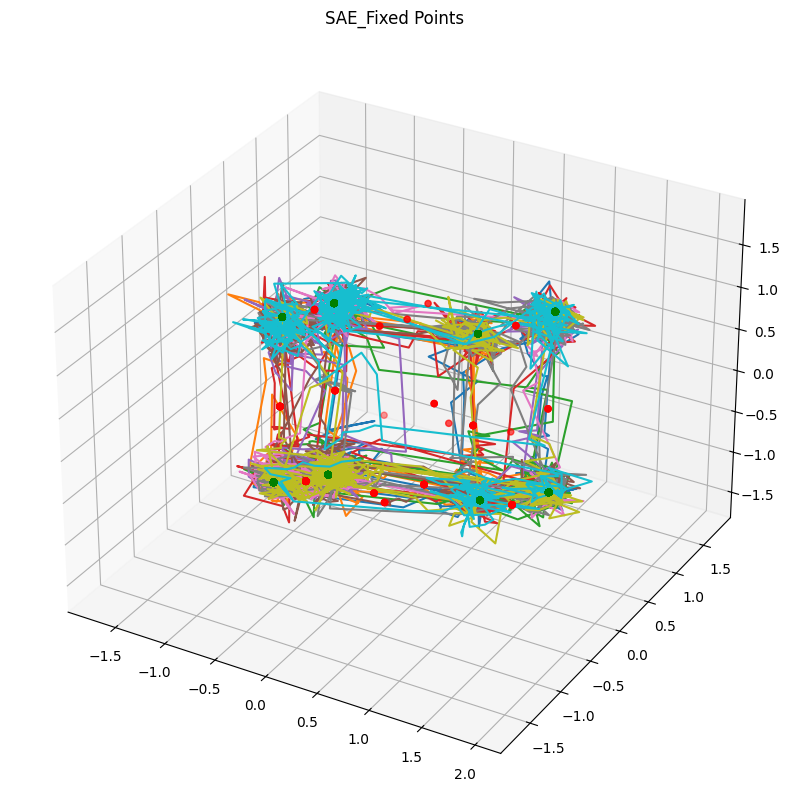

In [10]:
node_fps = analysis_NODE.plot_fps(
    inputs = torch.zeros(3),
    learning_rate = 6e-4,
    n_inits=1024,
    max_iters = 50000,                      
)


Iteration 500/50000
q = 5.66E-02 +/- 4.39E-01
dq = 1.76E-04 +/- 8.15E-04

Iteration 1000/50000
q = 1.74E-02 +/- 1.94E-01
dq = 3.15E-05 +/- 2.83E-04

Iteration 1500/50000
q = 8.05E-03 +/- 9.74E-02
dq = 1.07E-05 +/- 1.21E-04

Iteration 2000/50000
q = 4.41E-03 +/- 5.36E-02
dq = 4.91E-06 +/- 6.30E-05

Iteration 2500/50000
q = 2.62E-03 +/- 3.02E-02
dq = 2.55E-06 +/- 3.37E-05

Iteration 3000/50000
q = 1.66E-03 +/- 1.79E-02
dq = 1.40E-06 +/- 1.76E-05

Iteration 3500/50000
q = 1.12E-03 +/- 1.13E-02
dq = 8.42E-07 +/- 1.00E-05

Iteration 4000/50000
q = 7.80E-04 +/- 7.45E-03
dq = 5.40E-07 +/- 6.03E-06

Iteration 4500/50000
q = 5.58E-04 +/- 5.07E-03
dq = 3.64E-07 +/- 3.81E-06

Iteration 5000/50000
q = 4.06E-04 +/- 3.55E-03
dq = 2.50E-07 +/- 2.45E-06

Iteration 5500/50000
q = 3.02E-04 +/- 2.55E-03
dq = 1.75E-07 +/- 1.64E-06

Iteration 6000/50000
q = 2.27E-04 +/- 1.86E-03
dq = 1.27E-07 +/- 1.16E-06

Iteration 6500/50000
q = 1.72E-04 +/- 1.36E-03
dq = 9.35E-08 +/- 8.35E-07

Iteration 7000/50000
q = 

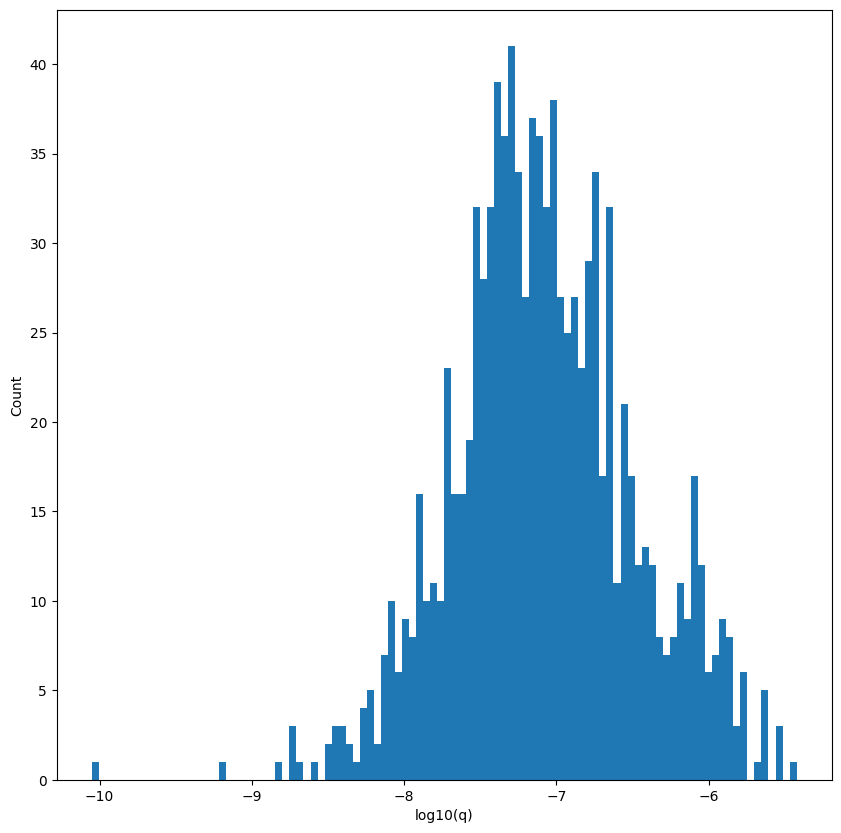

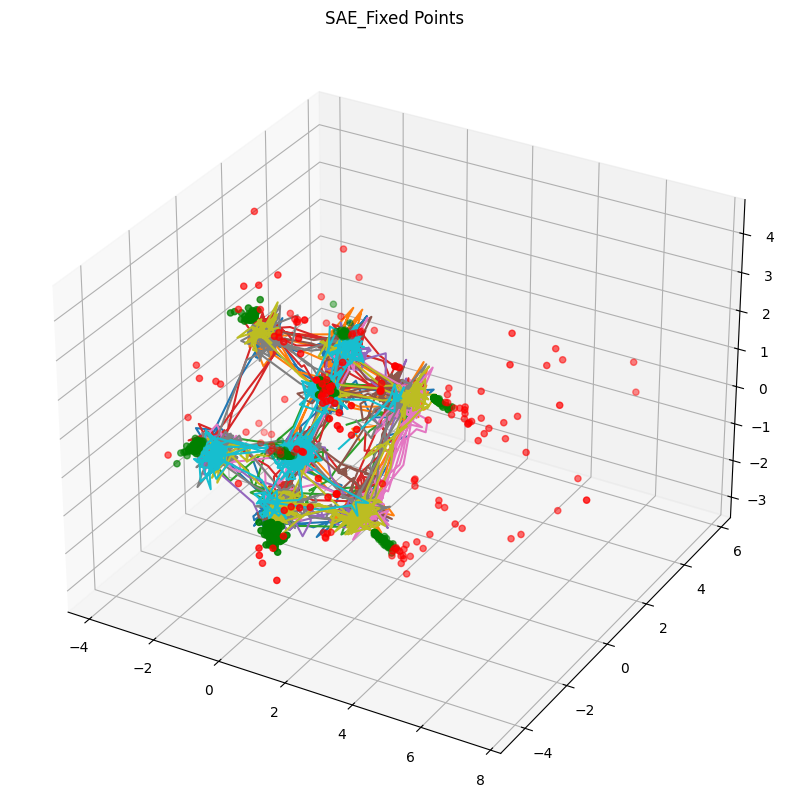

In [11]:
gru_fps = analysis_GRU.plot_fps(
    inputs = torch.zeros(3),
    learning_rate = 6e-4,
    n_inits=1024,
    max_iters = 50000,                      
)

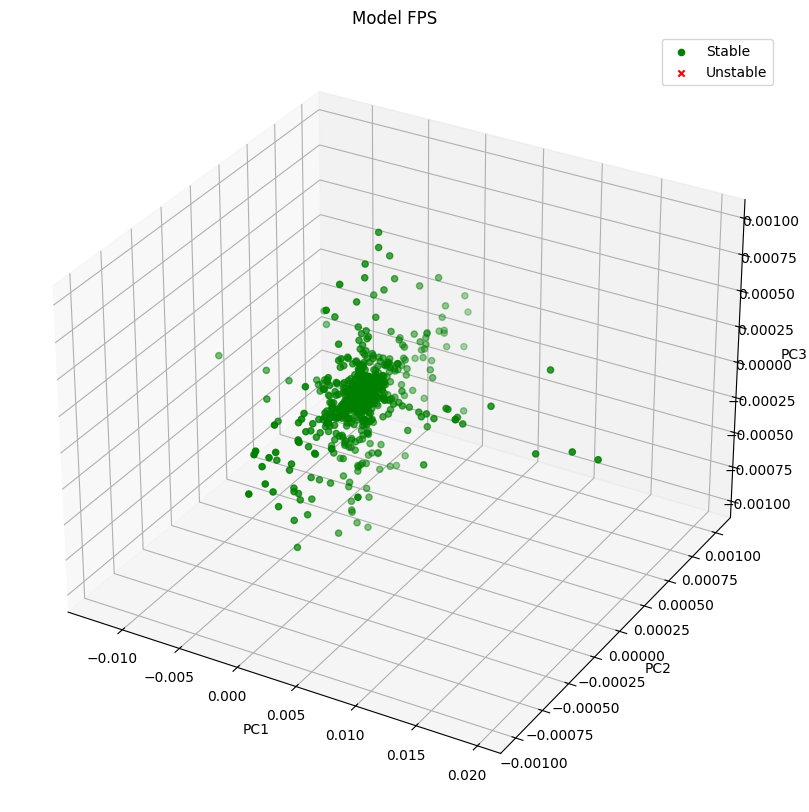

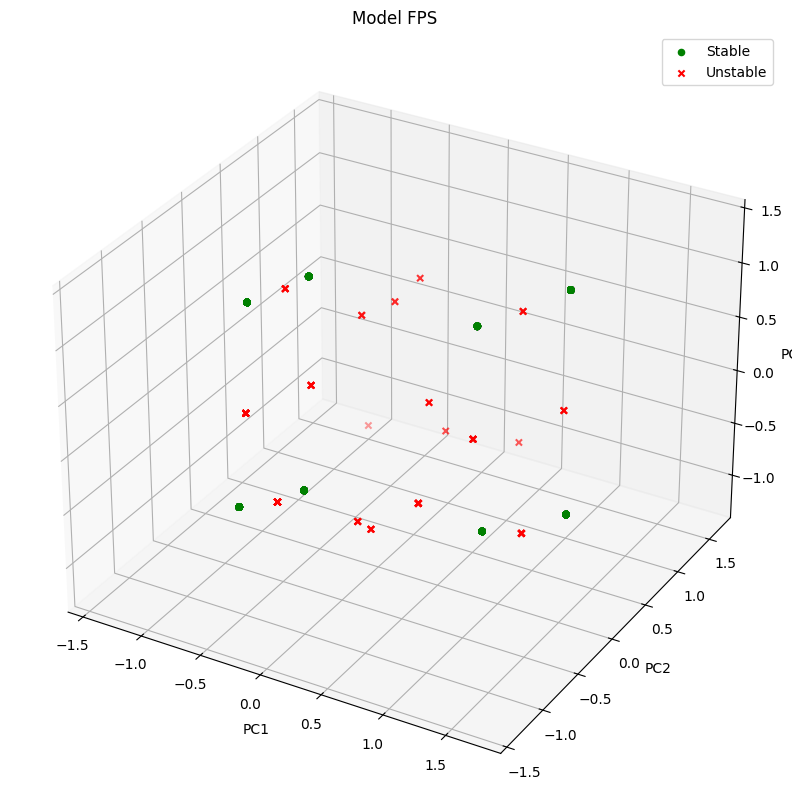

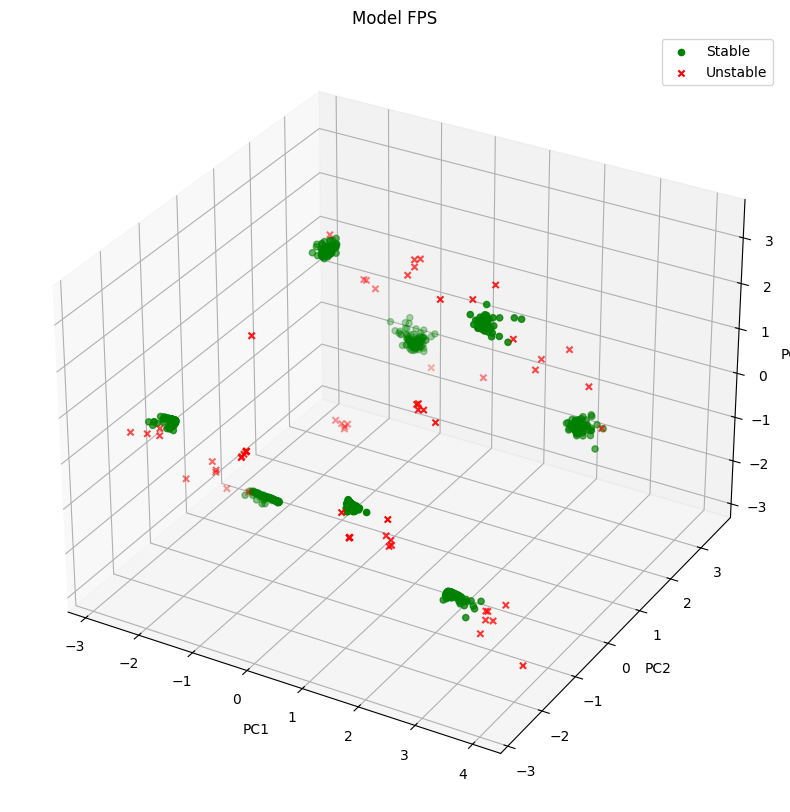

In [12]:
plot_model_fps(lds_fps, q_thresh = 1e-4)
plot_model_fps(node_fps, q_thresh = 1e-4)
plot_model_fps(gru_fps, q_thresh = 4e-7)